# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their bank loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default. 

- NT is the abbreviation for New Taiwain. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked in your pair.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [1]:
# import libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures


pd.options.display.max_columns=100


## 1. Data Cleaning

In [2]:
df = pd.read_csv('training_data.csv' , index_col=0)

In [3]:
df.Y.value_counts()

0                             17471
1                              5028
default payment next month        1
Name: Y, dtype: int64

In [4]:
# Split data to be used in the models
# Create matrix of features
X = df.drop('Y', axis = 1) # grabs everything else but 'Survived'


# Create target variable
y = df['Y'] # y is the column we're trying to predict

In [5]:
df['X3'].value_counts()

2            10516
1             7919
3             3713
5              208
4               90
6               42
0               11
EDUCATION        1
Name: X3, dtype: int64

In [6]:
# Reset index so that it's not equal to customer ID
df.reset_index(inplace=True)
# Rename columns
df.columns=list(df.iloc[18381])
# Remove row where ID = 'ID'
df=df[df.ID!="ID"]

df.reset_index(drop=True,inplace=True)
# Rename target variable as Y
df=df.rename(columns = {'default payment next month':'Y'})

df=df.astype(int)

## 2. EDA

In [7]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
1,25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
2,18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
4,6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22494,16247,40000,2,2,1,38,0,0,3,2,2,2,35183,39197,39477,39924,39004,41462,4600,1200,1400,0,3069,0,1
22495,2693,350000,1,1,1,42,-1,-1,-1,-1,-1,-1,3800,3138,4150,3750,1362,8210,3138,4160,3750,2272,8210,9731,0
22496,8076,100000,2,3,2,46,1,-1,2,2,-1,0,0,203,203,0,7856,16544,203,0,0,7856,10000,865,0
22497,20213,20000,2,3,1,50,-1,-1,-1,-1,-2,-2,5141,3455,6906,0,0,0,3754,6906,290,0,0,0,1


In [8]:
# Check for missing values
df.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Y            0
dtype: int64

In [9]:
default = df.Y.value_counts()
default

0    17471
1     5028
Name: Y, dtype: int64

<BarContainer object of 2 artists>

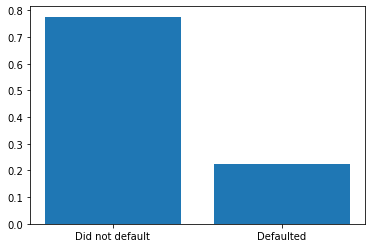

In [10]:
# Visualizing default rates
y = [default[0]/default.sum(), default[1]/default.sum()]
x = ['Did not default', 'Defaulted']

plt.bar(x,y)

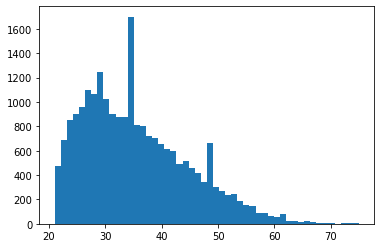

In [11]:
# Visualizing age distribution
plt.hist(df.AGE, bins=50)
plt.show()

In [12]:
# It seems that women tend to default at a slightly higher rate than men

In [13]:
df['MARRIAGE'].value_counts()

2    12026
1    10195
3      234
0       44
Name: MARRIAGE, dtype: int64

In [14]:
# Let's re-classify marriage status = 0 as other (3)
df.MARRIAGE = df.MARRIAGE.apply(lambda x: 3 if x==0 else x)

In [15]:
# Re-classifying all non-married persons as single
df.MARRIAGE = df.MARRIAGE.apply(lambda x: 2 if x==3 else x)

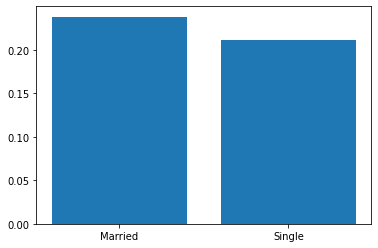

In [16]:
# Default rate by marriage status
x = np.sort(df['MARRIAGE'].unique())
y = [(df.groupby(['MARRIAGE']).Y.sum()[i]/len(df[df.MARRIAGE==i]['MARRIAGE'])) for i in x]

plt.bar(x, y)
plt.xticks(ticks = np.arange(1, 3, 1), labels=['Married', 'Single'])
plt.show()

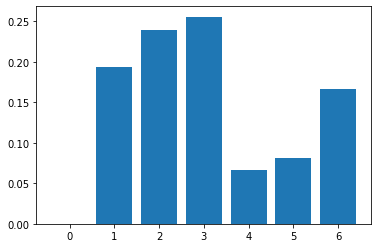

In [17]:
# Visualizing default rates by education level
x = df['EDUCATION'].unique()
y = [(df.groupby(['EDUCATION']).Y.sum()[i]/len(df[df.EDUCATION==i]['EDUCATION'])) for i in x]

plt.bar(x, y)
plt.xticks(ticks = np.arange(0, 7, 1))
plt.show()

In [18]:
# Exploring those with education==0
df[df.EDUCATION==0]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
4245,6877,360000,1,0,2,30,0,0,-1,0,0,-1,40250,23022,12272,34345,36777,30,23000,12280,25007,25008,1767,3300,0
5012,15108,210000,1,0,2,45,-2,-2,-2,-2,-2,-2,2563,5854,1032,788,3499,3372,5854,1032,788,3565,3372,15381,0
5702,3770,290000,2,0,2,38,1,-1,-1,-1,-1,-1,0,1437,3070,1406,2196,1481,1437,3078,1406,2196,1481,0,0
6675,17415,230000,2,0,2,47,-1,-1,-1,2,-1,-1,8394,5743,1336,255,5425,4838,5743,1598,0,5425,4838,3840,0
8450,20031,200000,2,0,2,30,-1,-1,2,-1,-1,-1,17160,7289,2868,9470,5816,7809,2880,0,9470,5834,7809,2886,0
8844,16897,200000,1,0,2,40,1,-2,-1,-1,-1,-2,0,0,200,1000,0,0,0,200,1000,0,0,0,0
13535,27156,160000,1,0,1,47,-1,-1,-1,-1,0,-1,386,907,3707,6987,3853,4613,907,3707,6991,77,4613,4099,0
13680,19921,50000,2,0,1,40,0,0,0,0,0,0,44749,46229,46798,47647,40500,41921,2229,2298,2100,2500,1921,8432,0
13838,5946,270000,1,0,2,39,1,-1,-1,-1,-1,-2,0,10193,69553,18607,0,0,10193,70213,19008,399,0,0,0
17256,16882,100000,1,0,2,37,0,0,-2,-2,-2,-2,7642,0,0,0,0,0,0,0,0,0,0,0,0


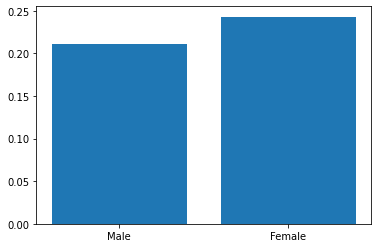

In [19]:
# Visualizing default rates by sex
x = df['SEX'].unique()
y = [(df.groupby(['SEX']).Y.sum()[1]/len(df[df.SEX==1]['SEX'])),
     (df.groupby(['SEX']).Y.sum()[2]/len(df[df.SEX==2]['SEX']))]

plt.bar(x, y)
plt.xticks(ticks = np.arange(1 ,3, 1), labels = ['Male', 'Female'])
plt.show()

In [20]:
total=[]
for i in range(len(df)):
    total.append(list(df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].loc[i].mode()))
total=[x[0]for x in total]
df['PAY_STAT_MODE']=total

In [21]:
df['BILL_AV']=df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)

In [22]:
df['PAY_AV']=df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].mean(axis=1)

In [23]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,PAY_STAT_MODE,BILL_AV,PAY_AV
0,28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1,0,208387.166667,31485.166667
1,25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0,-1,326.000000,326.000000
2,18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,0.000000,0.000000
3,690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0,0,46583.666667,1601.833333
4,6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1,0,5318.333333,883.333333


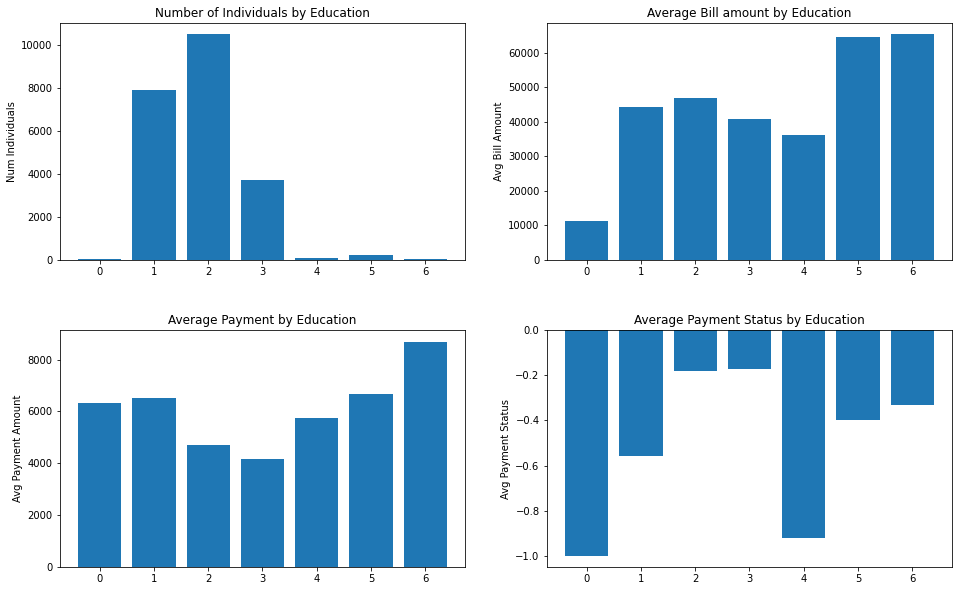

In [24]:
# Visualizing average bill amount, average payments, and median payment status by education

fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace = .30)

x = np.sort(df.EDUCATION.unique())
y1 = [df.EDUCATION.value_counts()[i] for i in x]

ax1 = fig.add_subplot(221)
ax1.bar(x, y1)
ax1.set_xticks(ticks = np.arange(0, 7, 1))
ax1.set_title('Number of Individuals by Education')
ax1.set_ylabel('Num Individuals')


y2 = [df.groupby(['EDUCATION']).BILL_AV.mean()[i] for i in x]

ax2 = fig.add_subplot(222)
ax2.bar(x, y2)
ax2.set_xticks(ticks = np.arange(0, 7, 1))
ax2.set_title('Average Bill amount by Education')
ax2.set_ylabel('Avg Bill Amount')

y3 = [df.groupby(['EDUCATION']).PAY_AV.mean()[i] for i in x]

ax3 = fig.add_subplot(223)
ax3.bar(x, y3)
ax3.set_xticks(ticks = np.arange(0, 7, 1))
ax3.set_title('Average Payment by Education')
ax3.set_ylabel('Avg Payment Amount')

y4 = [df.groupby(['EDUCATION']).PAY_STAT_MODE.mean()[i] for i in x]

ax4 = fig.add_subplot(224)
ax4.bar(x, y4)
ax4.set_xticks(ticks = np.arange(0, 7, 1))
ax4.set_title('Average Payment Status by Education')
ax4.set_ylabel('Avg Payment Status')

plt.show()


In [25]:
# Grouping 5,6, and 0 into unknown (5)
conditions = [
    df.EDUCATION==0,
    df.EDUCATION==6
]

choices = [
    5,
    5
]

df.EDUCATION = np.select(conditions, choices, default=df.EDUCATION)

 0    12554
-1     4657
-2     3358
 2     1789
 3       57
 7       44
 4       28
 1        8
 5        2
 8        1
 6        1
Name: PAY_STAT_MODE, dtype: int64


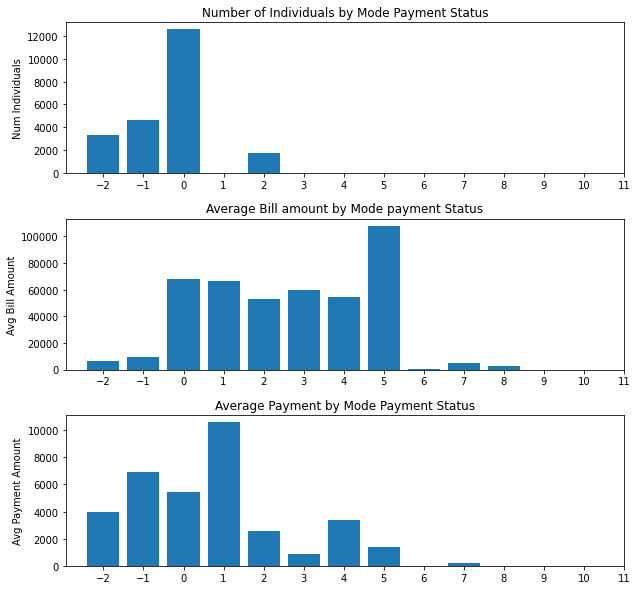

In [26]:
# Visualizing average bill amount, average payments, and median payment status by education

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace = .30)

range_pay = np.arange(-2,12,1)
x = np.sort(df.PAY_STAT_MODE.unique())
y1 = [df.PAY_STAT_MODE.value_counts()[i] for i in x]

ax1 = fig.add_subplot(311)
ax1.bar(x, y1)
ax1.set_xticks(ticks = range_pay)
ax1.set_title('Number of Individuals by Mode Payment Status')
ax1.set_ylabel('Num Individuals')


y2 = [df.groupby(['PAY_STAT_MODE']).BILL_AV.mean()[i] for i in x]

ax2 = fig.add_subplot(312)
ax2.bar(x, y2)
ax2.set_xticks(ticks = range_pay)
ax2.set_title('Average Bill amount by Mode payment Status')
ax2.set_ylabel('Avg Bill Amount')

y3 = [df.groupby(['PAY_STAT_MODE']).PAY_AV.mean()[i] for i in x]

ax3 = fig.add_subplot(313)
ax3.bar(x, y3)
ax3.set_xticks(ticks = range_pay)
ax3.set_title('Average Payment by Mode Payment Status')
ax3.set_ylabel('Avg Payment Amount')

# y4 = [df.groupby(['PAY_STAT_MODE'])..mean()[i] for i in x]

# ax4 = fig.add_subplot(224)
# ax4.bar(x, y4)
# ax4.set_xticks(ticks = np.arange(0, 7, 1))
# ax4.set_title('Average Payment Status by Education')
# ax4.set_ylabel('Avg Payment Status')

print(df.PAY_STAT_MODE.value_counts())
plt.show()

In [27]:
# Binning Age
conditions = [
    (df.AGE>=20)&(df.AGE<30),
    (df.AGE>=30)&(df.AGE<40),
    (df.AGE>=40)&(df.AGE<50),
    (df.AGE>=50)&(df.AGE<60),
    (df.AGE>=60)&(df.AGE<70),
    (df.AGE>=70)&(df.AGE<80)
]

choices = [
    '20s',
    '30s',
    '40s',
    '50s',
    '60s',
    '70s'
]

df.AGE = np.select(conditions, choices)

30s    8414
20s    7287
40s    4761
50s    1769
60s     247
70s      21
Name: AGE, dtype: int64


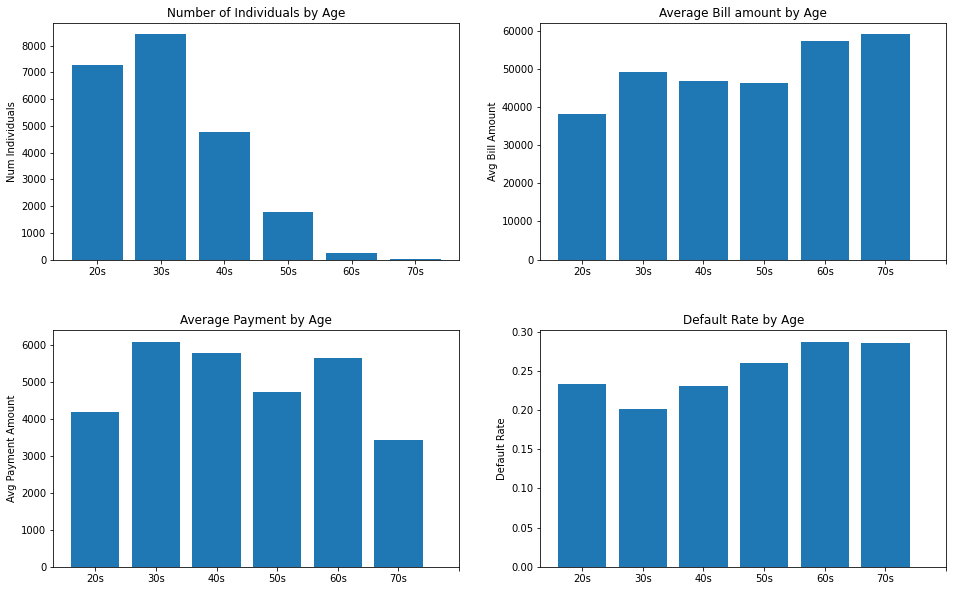

In [28]:
# Visualizing average bill amount, average payments, and median payment status by age

fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace = .30)

x = np.sort(df.AGE.unique())
y1 = [df.AGE.value_counts()[i] for i in x]

ax1 = fig.add_subplot(221)
ax1.bar(x, y1)
ax1.set_xticks(ticks = np.arange(0, 6, 1))
ax1.set_xticklabels(np.sort(df.AGE.unique()))
ax1.set_title('Number of Individuals by Age')
ax1.set_ylabel('Num Individuals')


y2 = [df.groupby(['AGE']).BILL_AV.mean()[i] for i in x]

ax2 = fig.add_subplot(222)
ax2.bar(x, y2)
ax2.set_xticks(ticks = np.arange(0, 7, 1))
ax2.set_title('Average Bill amount by Age')
ax2.set_ylabel('Avg Bill Amount')

y3 = [df.groupby(['AGE']).PAY_AV.mean()[i] for i in x]

ax3 = fig.add_subplot(223)
ax3.bar(x, y3)
ax3.set_xticks(ticks = np.arange(0, 7, 1))
ax3.set_title('Average Payment by Age')
ax3.set_ylabel('Avg Payment Amount')

y4 = [(df.groupby(['AGE']).Y.sum()[i]/len(df[df.AGE==i]['AGE'])) for i in x]

ax4 = fig.add_subplot(224)
ax4.bar(x, y4)
ax4.set_xticks(ticks = np.arange(0, 7, 1))
ax4.set_title('Default Rate by Age')
ax4.set_ylabel('Default Rate')

print(df.AGE.value_counts())

plt.show()

In [29]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,PAY_STAT_MODE,BILL_AV,PAY_AV
0,28835,220000,2,1,2,30s,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1,0,208387.166667,31485.166667
1,25329,200000,2,3,2,20s,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0,-1,326.000000,326.000000
2,18894,180000,2,1,2,20s,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,0.000000,0.000000
3,690,80000,1,2,2,30s,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0,0,46583.666667,1601.833333
4,6239,10000,1,2,2,20s,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1,0,5318.333333,883.333333


## 3. Feature Engineering

In [30]:
# Gen feature for num months that went over credit limit
df['MON_OV_BAL']=0
conditions=[
    df.BILL_AMT1>=df.LIMIT_BAL,
    df.BILL_AMT2>=df.LIMIT_BAL,
    df.BILL_AMT3>=df.LIMIT_BAL,
    df.BILL_AMT4>=df.LIMIT_BAL,
    df.BILL_AMT5>=df.LIMIT_BAL,
    df.BILL_AMT6>=df.LIMIT_BAL,
]
choises = [
    df['MON_OV_BAL']+1,
    df['MON_OV_BAL']+1,
    df['MON_OV_BAL']+1,
    df['MON_OV_BAL']+1,
    df['MON_OV_BAL']+1,
    df['MON_OV_BAL']+1,
      
]
df['MON_OV_BAL']=np.select(conditions,choises)

In [31]:
df.MON_OV_BAL

0        1
1        0
2        0
3        0
4        0
        ..
22494    1
22495    0
22496    0
22497    0
22498    0
Name: MON_OV_BAL, Length: 22499, dtype: int64

In [32]:
# Column summing Pay columns
df['SUM_PAY_STAT']=df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].sum(axis=1)
df['SUM_PAY_STAT']

0         0
1        -6
2       -12
3         0
4         0
         ..
22494     9
22495    -6
22496     3
22497    -8
22498    11
Name: SUM_PAY_STAT, Length: 22499, dtype: int64

In [33]:
# Feature for if bill amount increases
df['MON_BIL_INC']=0
conditions=[
    df.BILL_AMT2>=df.BILL_AMT1,
    df.BILL_AMT3>=df.BILL_AMT2,
    df.BILL_AMT4>=df.BILL_AMT3,
    df.BILL_AMT5>=df.BILL_AMT4,
    df.BILL_AMT6>=df.BILL_AMT5,
]
choises = [
    df['MON_BIL_INC']+1,
    df['MON_BIL_INC']+1,
    df['MON_BIL_INC']+1,
    df['MON_BIL_INC']+1,
    df['MON_BIL_INC']+1,
    
      
]
df['MON_BIL_INC']=np.select(conditions,choises,default=df['MON_BIL_INC']+0)

In [34]:
df.MON_BIL_INC

0        1
1        1
2        1
3        1
4        1
        ..
22494    1
22495    1
22496    1
22497    1
22498    1
Name: MON_BIL_INC, Length: 22499, dtype: int64

In [35]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,PAY_STAT_MODE,BILL_AV,PAY_AV,MON_OV_BAL,SUM_PAY_STAT,MON_BIL_INC
0,28835,220000,2,1,2,30s,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1,0,208387.166667,31485.166667,1,0,1
1,25329,200000,2,3,2,20s,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0,-1,326.000000,326.000000,0,-6,1
2,18894,180000,2,1,2,20s,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,0.000000,0.000000,0,-12,1
3,690,80000,1,2,2,30s,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0,0,46583.666667,1601.833333,0,0,1
4,6239,10000,1,2,2,20s,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1,0,5318.333333,883.333333,0,0,1


In [36]:
# Percentage of one's credit limit that is used
df['AVG_UTILIZATION'] = df.BILL_AV/df.LIMIT_BAL

In [37]:
# Average percentage of credit card bill paid
df['AVG_PERCENT_PAID'] = df.PAY_AV/df.BILL_AV

In [38]:
df.AVG_PERCENT_PAID.fillna(value=0, inplace=True)

In [39]:
df.AVG_PERCENT_PAID.replace(np.inf, value=0, inplace=True)

In [40]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,PAY_STAT_MODE,BILL_AV,PAY_AV,MON_OV_BAL,SUM_PAY_STAT,MON_BIL_INC,AVG_UTILIZATION,AVG_PERCENT_PAID
0,28835,220000,2,1,2,30s,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1,0,208387.166667,31485.166667,1,0,1,0.947214,0.151090
1,25329,200000,2,3,2,20s,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0,-1,326.000000,326.000000,0,-6,1,0.001630,1.000000
2,18894,180000,2,1,2,20s,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,0.000000,0.000000,0,-12,1,0.000000,0.000000
3,690,80000,1,2,2,30s,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0,0,46583.666667,1601.833333,0,0,1,0.582296,0.034386
4,6239,10000,1,2,2,20s,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1,0,5318.333333,883.333333,0,0,1,0.531833,0.166092


In [41]:
#Creating dummy variables for age group
df=pd.get_dummies(df,columns=['AGE'],drop_first=True)

In [42]:
# perform a polynomial features transform of the dataset
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y',
       'PAY_STAT_MODE', 'BILL_AV', 'PAY_AV', 'MON_OV_BAL', 'SUM_PAY_STAT',
       'MON_BIL_INC', 'AVG_UTILIZATION', 'AVG_PERCENT_PAID', 'AGE_30s',
       'AGE_40s', 'AGE_50s', 'AGE_60s', 'AGE_70s'],
      dtype='object')

In [43]:
#Creating a column that calculates the usage of the card.
df['PERCENT_USAGE']=(df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis=1)*600)/(df['LIMIT_BAL']*6)

In [44]:
df['BEEN_LATE']=0
conditions=[
(df.PAY_0>=1)|(df.PAY_2>=1)|(df.PAY_3>=1)|(df.PAY_4>=1)|(df.PAY_5>=1)|(df.PAY_6>=1),

]
choises = [
    1,
]
df['BEEN_LATE']=np.select(conditions,choises,default=0)   
      

In [45]:
df['TOTAL_USAGE']=(df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].sum(axis=1))

In [46]:
df['TOTAL_PAY']=(df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1))

## 4. Feature Selection

In [47]:
df2=df.copy()

In [48]:
df=df2.copy()

In [49]:
df2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,PAY_STAT_MODE,BILL_AV,PAY_AV,MON_OV_BAL,SUM_PAY_STAT,MON_BIL_INC,AVG_UTILIZATION,AVG_PERCENT_PAID,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_70s,PERCENT_USAGE,BEEN_LATE,TOTAL_USAGE,TOTAL_PAY
0,28835,220000,2,1,2,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1,0,208387.166667,31485.166667,1,0,1,0.947214,0.151090,1,0,0,0,0,568.328636,0,1250323,188911
1,25329,200000,2,3,2,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0,-1,326.000000,326.000000,0,-6,1,0.001630,1.000000,0,0,0,0,0,0.978000,0,1956,1956
2,18894,180000,2,1,2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,0.000000,0.000000,0,-12,1,0.000000,0.000000,0,0,0,0,0,0.000000,0,0,0
3,690,80000,1,2,2,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0,0,46583.666667,1601.833333,0,0,1,0.582296,0.034386,1,0,0,0,0,349.377500,0,279502,9611
4,6239,10000,1,2,2,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1,0,5318.333333,883.333333,0,0,1,0.531833,0.166092,0,0,0,0,0,319.100000,0,31910,5300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22494,16247,40000,2,2,1,0,0,3,2,2,2,35183,39197,39477,39924,39004,41462,4600,1200,1400,0,3069,0,1,2,39041.166667,1711.500000,1,9,1,0.976029,0.043838,1,0,0,0,0,585.617500,1,234247,10269
22495,2693,350000,1,1,1,-1,-1,-1,-1,-1,-1,3800,3138,4150,3750,1362,8210,3138,4160,3750,2272,8210,9731,0,-1,4068.333333,5210.166667,0,-6,1,0.011624,1.280664,0,1,0,0,0,6.974286,0,24410,31261
22496,8076,100000,2,3,2,1,-1,2,2,-1,0,0,203,203,0,7856,16544,203,0,0,7856,10000,865,0,-1,4134.333333,3154.000000,0,3,1,0.041343,0.762880,0,1,0,0,0,24.806000,1,24806,18924
22497,20213,20000,2,3,1,-1,-1,-1,-1,-2,-2,5141,3455,6906,0,0,0,3754,6906,290,0,0,0,1,-1,2583.666667,1825.000000,0,-8,1,0.129183,0.706360,0,0,1,0,0,77.510000,0,15502,10950


## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

In [50]:
df.columns[df.columns!='Y']

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'PAY_STAT_MODE', 'BILL_AV', 'PAY_AV', 'MON_OV_BAL', 'SUM_PAY_STAT',
       'MON_BIL_INC', 'AVG_UTILIZATION', 'AVG_PERCENT_PAID', 'AGE_30s',
       'AGE_40s', 'AGE_50s', 'AGE_60s', 'AGE_70s', 'PERCENT_USAGE',
       'BEEN_LATE', 'TOTAL_USAGE', 'TOTAL_PAY'],
      dtype='object')

In [70]:
#Creating our features for our model.
feat=list(df.columns[df.columns!='Y'])

In [71]:
#creating our X and Y variables.
X = df[feat]
y = df['Y']

In [72]:
# Creating our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [73]:
#scaling regular split
scaler= StandardScaler()

#### Logistic Regression

In [74]:
# Fitting our basic logistic regression model.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

scaler.fit(X_train)
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train_scale, y_train)

lr_preds = lr.predict(X_test_scale)

lr_f1 = metrics.f1_score(y_test, lr_preds)

print(lr_f1)

0.5102491327656891


#### Random Forest

In [56]:
# Creating random forest model.
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

#use the fitted model to predict on the test data
rfc_preds = rfc.predict(X_test)

rfc_f1 = metrics.f1_score(y_test, rfc_preds)

# checking accuracy on the test data
print('Test F1 score: ', rfc_f1)

Test F1 score:  0.46043899948953554


#### Grid Search

In [57]:
#Grid search for random forest basic.
from sklearn.model_selection import GridSearchCV
# param_grid = { 
#     'n_estimators': [100,200],
#     'criterion': ['gini'],
#     'max_depth': list(range(2,50,2)),
#     'min_samples_leaf': list(range(5,7))
# }

# grid_tree=GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# grid_tree.fit(X_train, y_train)

In [58]:
# print("F1 Train:",grid_tree.best_score_)

# y_pred = grid_tree.best_estimator_.predict(X_test)

# print("F1 Test:",metrics.f1_score(y_test, y_pred))

In [75]:
#Grid search for random logistic regression basic.

param_grid = { 
     "class_weight":['balanced'],
    "C":[0.001,0.01,0.1,1,10],
    "max_iter":[10000],

}

grid_log=GridSearchCV(LogisticRegression(), param_grid, cv=50, scoring='f1', verbose=1, n_jobs=-1)

grid_log.fit(X_train_scale, y_train)

Fitting 50 folds for each of 5 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    6.8s finished


GridSearchCV(cv=50, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': ['balanced'], 'max_iter': [10000]},
             scoring='f1', verbose=1)

In [76]:
print("F1 Train:",grid_log.best_score_)

y_log = grid_log.best_estimator_.predict(X_test_scale)

print("F1 Test:",metrics.f1_score(y_test, y_log))

F1 Train: 0.518742368107451
F1 Test: 0.511378002528445


In [77]:
df.to_csv('bakeoff2.csv',index=False)

## 6. Model Evaluation

In [79]:
df.loc[:10]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,PAY_STAT_MODE,BILL_AV,PAY_AV,MON_OV_BAL,SUM_PAY_STAT,MON_BIL_INC,AVG_UTILIZATION,AVG_PERCENT_PAID,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_70s,PERCENT_USAGE,BEEN_LATE,TOTAL_USAGE,TOTAL_PAY
0,28835,220000,2,1,2,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1,0,208387.166667,31485.166667,1,0,1,0.947214,0.151090,1,0,0,0,0,568.328636,0,1250323,188911
1,25329,200000,2,3,2,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0,-1,326.000000,326.000000,0,-6,1,0.001630,1.000000,0,0,0,0,0,0.978000,0,1956,1956
2,18894,180000,2,1,2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,0.000000,0.000000,0,-12,1,0.000000,0.000000,0,0,0,0,0,0.000000,0,0,0
3,690,80000,1,2,2,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0,0,46583.666667,1601.833333,0,0,1,0.582296,0.034386,1,0,0,0,0,349.377500,0,279502,9611
4,6239,10000,1,2,2,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1,0,5318.333333,883.333333,0,0,1,0.531833,0.166092,0,0,0,0,0,319.100000,0,31910,5300
5,14912,240000,1,2,1,0,0,-1,-1,-1,-1,66394,63650,7117,2898,5530,67010,1273,7117,2905,5530,46275,17446,0,-1,35433.166667,13424.333333,0,-4,1,0.147638,0.378863,0,1,0,0,0,88.582917,0,212599,80546
6,9405,110000,2,2,2,0,0,0,0,0,0,111271,111532,107998,79211,77881,80628,6000,4016,3000,3000,4000,4000,0,0,94753.500000,4002.666667,1,0,1,0.861395,0.042243,0,0,0,0,0,516.837273,0,568521,24016
7,12899,50000,1,2,2,2,0,0,0,-1,-1,49804,28662,29476,4011,1000,0,2000,1500,1000,1000,0,0,0,0,18825.500000,916.666667,0,0,1,0.376510,0.048693,1,0,0,0,0,225.906000,1,112953,5500
8,6495,180000,2,2,2,-2,-2,-2,-2,-2,-2,-117,2573,-77,-77,1823,227,2690,0,0,1900,230,0,0,-2,725.333333,803.333333,0,-12,1,0.004030,1.107537,1,0,0,0,0,2.417778,0,4352,4820
9,11632,50000,1,3,1,0,0,0,0,0,0,31236,30141,18683,19055,19462,19343,3088,1500,651,682,680,595,0,0,22986.666667,1199.333333,0,0,1,0.459733,0.052175,0,0,1,0,0,275.840000,0,137920,7196


## 7. Final Model